In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from pandas_profiling import ProfileReport

C:\Users\HP\AppData\Local\Temp\ipykernel_16284\2974087576.py:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df = pd.read_csv('Electric_cars_dataset.csv')

In [3]:
df.head()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [5]:
df.describe()

,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
count,64347.000000,64346.000000,64353.000000,64353.000000,64184.000000,6.435300e+04
mean,98143.452888,2018.186212,106.948985,2524.990754,29.951904,1.972905e+08
std,2856.064329,2.726742,104.093919,12402.895104,14.661124,1.069466e+08
min,745.000000,1993.000000,0.000000,0.000000,0.000000,4.385000e+03
25%,98052.000000,2017.000000,14.000000,0.000000,19.000000,1.372865e+08
50%,98121.000000,2018.000000,73.000000,0.000000,34.000000,1.753776e+08
75%,98370.000000,2021.000000,215.000000,0.000000,43.000000,2.299039e+08
max,99701.000000,2022.000000,337.000000,845000.000000,49.000000,4.789346e+08


In [6]:
df.describe(include = 'object')

,ID,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility,Expected Price ($1k)
count,64353,64353,64349,64344,64342,64349,64340,64353,64353,63843,63631,64353
unique,64353,5644,139,544,38,34,107,2,3,668,68,210
top,EV33174,5YJYGDEE9M,King,SEATTLE,WA,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.122018 47.678465),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),69
freq,1,340,33552,11887,64168,27903,13138,47869,39948,1712,22555,4816


In [7]:
df.describe(include = 'all')

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
count,64353,64353,64349,64344,64342,64347.000000,64346.000000,64349,64340,64353,64353,64353.000000,64353.000000,64184.000000,6.435300e+04,63843,63631,64353
unique,64353,5644,139,544,38,NaN,NaN,34,107,2,3,NaN,NaN,NaN,NaN,668,68,210
top,EV33174,5YJYGDEE9M,King,SEATTLE,WA,NaN,NaN,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,NaN,NaN,POINT (-122.122018 47.678465),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),69
freq,1,340,33552,11887,64168,NaN,NaN,27903,13138,47869,39948,NaN,NaN,NaN,NaN,1712,22555,4816
mean,NaN,NaN,NaN,NaN,NaN,98143.452888,2018.186212,NaN,NaN,NaN,NaN,106.948985,2524.990754,29.951904,1.972905e+08,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2856.064329,2.726742,NaN,NaN,NaN,NaN,104.093919,12402.895104,14.661124,1.069466e+08,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,745.000000,1993.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.385000e+03,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,98052.000000,2017.000000,NaN,NaN,NaN,NaN,14.000000,0.000000,19.000000,1.372865e+08,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,98121.000000,2018.000000,NaN,NaN,NaN,NaN,73.000000,0.000000,34.000000,1.753776e+08,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,98370.000000,2021.000000,NaN,NaN,NaN,NaN,215.000000,0.000000,43.000000,2.299039e+08,NaN,NaN,NaN


In [8]:
df.isnull().sum()

ID                                                     0
VIN (1-10)                                             0
County                                                 4
City                                                   9
State                                                 11
ZIP Code                                               6
Model Year                                             7
Make                                                   4
Model                                                 13
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
DOL Vehicle ID                                         0
Vehicle Location                                     510
Electric Utility                                     722
Expected Price ($1k)           

In [9]:
df.dropna(inplace=True)

In [10]:
df.describe(include = 'object').T

,count,unique,top,freq
ID,63081,63081,EV33174,1
VIN (1-10),63081,5592,5YJYGDEE9M,334
County,63081,41,King,33121
City,63081,398,SEATTLE,11463
State,63081,3,WA,63076
Make,63081,34,TESLA,27398
Model,63081,107,MODEL 3,12889
Electric Vehicle Type,63081,2,Battery Electric Vehicle (BEV),47001
Clean Alternative Fuel Vehicle (CAFV) Eligibility,63081,3,Clean Alternative Fuel Vehicle Eligible,39172
Vehicle Location,63081,499,POINT (-122.122018 47.678465),1710


In [11]:
print(f"Duplicate entries: {df.duplicated().sum()}")

Duplicate entries: 0


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63081 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 63081 non-null  object 
 1   VIN (1-10)                                         63081 non-null  object 
 2   County                                             63081 non-null  object 
 3   City                                               63081 non-null  object 
 4   State                                              63081 non-null  object 
 5   ZIP Code                                           63081 non-null  float64
 6   Model Year                                         63081 non-null  float64
 7   Make                                               63081 non-null  object 
 8   Model                                              63081 non-null  object 
 9   Electric Ve

In [14]:
df.head(3)

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18


In [15]:
columns_to_drop = ['ID', 'VIN (1-10)', 'Vehicle Location']
df = df.drop(columns=columns_to_drop)

In [16]:
df['Expected Price ($1k)']=df['Expected Price ($1k)'].astype(object).astype(float)
print(df.dtypes)

County                                                object
City                                                  object
State                                                 object
ZIP Code                                             float64
Model Year                                           float64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Electric Utility                                      object
Expected Price ($1k)                                 float64
dtype: object


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63081 entries, 0 to 64352
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   County                                             63081 non-null  object 
 1   City                                               63081 non-null  object 
 2   State                                              63081 non-null  object 
 3   ZIP Code                                           63081 non-null  float64
 4   Model Year                                         63081 non-null  float64
 5   Make                                               63081 non-null  object 
 6   Model                                              63081 non-null  object 
 7   Electric Vehicle Type                              63081 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  63081 non-null  object 
 9   Electric Ra

In [18]:
from scipy import stats

In [19]:
# Assuming 'price' is the target variable
z_scores = np.abs(stats.zscore(df['Expected Price ($1k)']))
df = df[(z_scores < 3 )]  # Keep data points within 3 standard deviations

In [20]:
df.describe(include = 'object').T

,count,unique,top,freq
County,62603,41,King,32834
City,62603,398,SEATTLE,11391
State,62603,3,WA,62598
Make,62603,33,TESLA,27063
Model,62603,105,MODEL 3,12889
Electric Vehicle Type,62603,2,Battery Electric Vehicle (BEV),46527
Clean Alternative Fuel Vehicle (CAFV) Eligibility,62603,3,Clean Alternative Fuel Vehicle Eligible,39081
Electric Utility,62603,68,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),22326


In [21]:
df = pd.get_dummies(df, columns=['State', 'Electric Vehicle Type',  'Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

In [22]:
from  sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()

columns_to_encode = ['County', 'City', 'Make', 'Model', 
'Electric Utility'] 
df[columns_to_encode] = df[columns_to_encode].apply(lab.fit_transform)
print(df)

       County  City  ZIP Code  Model Year  Make  Model  Electric Range  \
0          31   195   98037.0      2020.0    27     55             308   
1          29    25   98229.0      2011.0    21     51              73   
2          27   348   98422.0      2015.0     3     43              81   
3          16   287   98053.0      2013.0     5     94              38   
4          27   278   98375.0      2019.0     5     14             238   
...       ...   ...       ...         ...   ...    ...             ...   
64348      16   312   98144.0      2020.0    14     59             239   
64349      27   348   98402.0      2013.0    29     67               6   
64350      16   312   98119.0      2018.0     5     14             238   
64351      16   312   98115.0      2017.0    23     18              14   
64352      20   355   98591.0      2019.0    21     51             150   

       Base MSRP  Legislative District  DOL Vehicle ID  Electric Utility  \
0              0                  3

In [23]:
df.rename(columns={'Expected Price ($1k)': 'Price'}, inplace = True)
df

,County,City,ZIP Code,Model Year,Make,Model,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,Price,State_MT,State_OR,State_WA,Electric Vehicle Type_Battery Electric Vehicle (BEV),Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle Eligible,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Eligibility unknown as battery range has not been researched,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range
0,31,195,98037.0,2020.0,27,55,308,0,32.0,109821694,65,50.000,False,False,True,True,False,True,False,False
1,29,25,98229.0,2011.0,21,51,73,0,40.0,137375528,65,15.000,False,False,True,True,False,True,False,False
2,27,348,98422.0,2015.0,3,43,81,0,27.0,150627382,20,18.000,False,False,True,True,False,True,False,False
3,16,287,98053.0,2013.0,5,94,38,0,45.0,258766301,66,33.900,False,False,True,False,True,True,False,False
4,27,278,98375.0,2019.0,5,14,238,0,25.0,296998138,16,41.780,False,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64348,16,312,98144.0,2020.0,14,59,239,0,37.0,156575107,52,33.000,False,False,True,True,False,True,False,False
64349,27,348,98402.0,2013.0,29,67,6,0,27.0,211048701,20,13.300,False,False,True,False,True,False,False,True
64350,16,312,98119.0,2018.0,5,14,238,0,36.0,135543411,52,22.857,False,False,True,True,False,True,False,False
64351,16,312,98115.0,2017.0,23,18,14,0,46.0,192459907,52,45.700,False,False,True,False,True,False,False,True


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62603 entries, 0 to 64352
Data columns (total 20 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   County                                                                                                          62603 non-null  int32  
 1   City                                                                                                            62603 non-null  int32  
 2   ZIP Code                                                                                                        62603 non-null  float64
 3   Model Year                                                                                                      62603 non-null  float64
 4   Make                                         

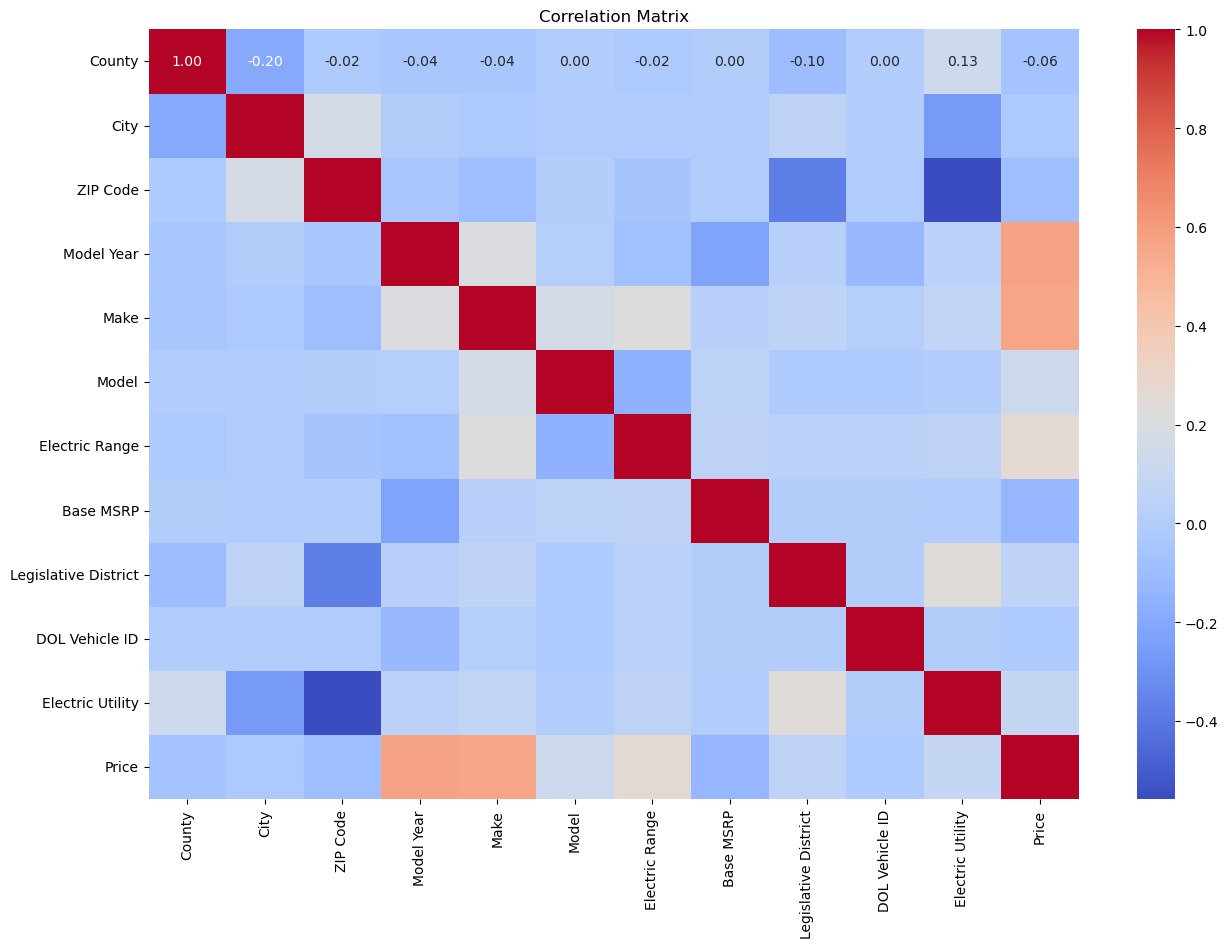

In [27]:
numerical_features = df.select_dtypes(include='number').columns
numerical_features

plt.figure(figsize=(15, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [37]:
numerical_features = df.select_dtypes(include='number').columns
correlation = df[numerical_features].corr().apply(abs)
correlation = correlation[['Price']].sort_values(['Price'], ascending=False)
correlation

# Set a threshold for low correlation (e.g., absolute correlation < 0.1)
threshold = 0.1

# Filter the column names that have an absolute correlation with SalePrice below the threshold
low_corr_columns = correlation[correlation['Price']< threshold].index.tolist()

# Print the list of columns with low correlation
print(f"Columns with correlation less than {threshold}:\n", low_corr_columns)


Columns with correlation less than 0.1:
 ['ZIP Code', 'Electric Utility', 'County', 'Legislative District', 'City', 'DOL Vehicle ID']


In [38]:
df = df.drop(columns=low_corr_columns)

In [40]:
X = df.drop('Price', axis=1)
y = df['Price']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [49]:
# Initialize the model with some parameters
svr_reg = SVR(kernel='rbf', C=100, epsilon=0.1)

# Fit the model
svr_reg.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred_svr = svr_reg.predict(X_test_scaled)

# Model evaluation
print("SVR RMSE:", mean_squared_error(y_test, y_pred_svr, squared=False))
print("SVR R2 Score:", r2_score(y_test, y_pred_svr))

SVR RMSE: 6.9801033001432025
SVR R2 Score: 0.9047453849993158
